One thing I do know, I was blind but now I see. (John 9:25b)

-------
<img src="https://github.com/idebtor/DSpy/blob/6b3676c3de29f85d2e7f30679676d1fd96d88b17/images/WelcomeToDataStructures.jpg?raw=true" width=1000>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

--------

<b style="font-size:30px">  Chapter 3. Linear Data Structures (선형 자료구조)

: 선형 자료구조란 무엇인가 (스택,큐,리스트 등)  

--------------
제 3장에서는 선형 자료구조에 대해 알아봅니다. 선형 자료구조란 무엇이며, 자료구조에 사용되는 대표적인 선형 자료구조들을 배우고 간단한 실습을 통해 구현해보며 익히게 됩니다. 자료구조의 기초가 되며, 이후 운영체제, 알고리즘, 네트워크 등 모든 영역에 활용되는 것 이므로 적극적인 자세로 재밌게 배우면 좋겠습니다!



<b style="font-size:20px"> Lecture note: Time and Timeit </b>

프로그램의 성능을 분석할 때, 특히 알고리즘이나 함수의 시간 복잡도를 중점적으로 다룬다면 스톱워치만으로 충분한 경우가 대부분입니다. 실행하는 데 몇 초 또는 몇 분이 걸리는 두 Code snippet 사이의 시간을 프로파일링하는 것이 목적이라면 스톱워치만으로 충분합니다.
 
파이썬 표준 라이브러리에는 스톱워치 역할을 하는 두 가지 함수가 있다. 타임 모듈의 `time.perf_counter()` 함수는 운영체제의 고분해능 타이머를 호출해서 임의의 타임스탬프를 구합니다. 작업 전과 후에 한 번씩 `time.perf_counter()`를 호출하면 둘 사이의 차이를 확인할 수 있습니다. 간단히, 오버헤드 없이 코드 시간을 측정할 수 있는 방법입니다.
 
타임잇 모듈은 파이썬 코드를 대상으로 실제 벤치마킹과 비슷한 작업을 수행합니다. `timeit.timeit` 함수는 Code snippet을 취해서 여러 번 실행하고(기본값은 100만 패스) 소요된 총 시간을 구합니다. 타이트한 루프에서 단일 작업이나 함수 호출의 성능을 알아보는 데 적합합니다. 예를 들어 많은 횟수로 반복되는 작업에서 리스트 컴프리헨션(list comprehension)과 일반적인 리스트 구조 중 무엇이 더 빠른지 알아볼 수 있다(보통 리스트 컴프리헨션이 더 빠름).
 
타임의 단점은 스톱워치 기능이 전부라는 것이고, 타임잇의 단점은 주 용도가 코드의 라인 하나하나 또는 블록을 대상으로 한 마이크로 벤치마크라는 것입니다. 이 두 모듈은 일정 부분의 코드 즉 함수나 알고리즘을 대상으로만 효과적입니다. 즉, 수천 라인의 프로그램 코드에서 가장 많은 시간을 소비하는 부분을 찾는 전체 프로그램 분석 용도로는 두 가지 모두 충분하지 않아서 다른 전문적인 도구를 사용합니다. 본 과정에서는 `time`과 `timeit`모듈만 다룹니다. 

# 데크$^{Deque}$ Profiling Exercise

## Step1:  `perf_counter()` 사용하기

- `perf_counter()`는 파이썬 time 모듈에서 성능 분석을 위하여 시간을 측정할 수 있도록 제공하는 함수입니다. 
- 다음은 두 개의 작업 즉 list의 insert(0, i)와 deque의 appendleft()의 시간복잡도를 비교하기 위한 코드입니다. 여기서는 간단히 파이썬에서 제공하는 스톱워치와 같은 기능을 하는 `perf_counter()`를 사용합니다. 
- 다만, 아래의 코드의 두 블록이 호출하는 작업만 다를 뿐 진행하는 과정이 동일합니다. 이렇게 반복되는 코드를 수정하는 과정을 통해 일급 객체(the first class object)를 활용하는 기술을 익히게 됩니다. 

<b style="font-size:20px"> Lecture note: The first class object </b>

일급 객체(first-class)는 객체 지향 프로그래밍(object-oriented programming)중에서 파이썬을 포함한 몇몇 프로그래밍 언어에서 발견할 수 있는 개념입니다. 아래는 이를 잘 드러내는 파이썬의 철학이다.
'모든 것은 객체(object)다' 
파이썬에서 다루는 모든 것이 다 객체입니다. 즉 숫자, 문자열, 튜플, 리스트, 딕셔너리, 그리고 함수를 포함합니다. 함수는 그 중에서도 일급 객체(first-class object)입니다. 이 뜻은 다음과 같습니다. 

- 함수를 변수에 할당 가능
- 다른 함수에서 해당 함수를 인자로 전달 가능
- 함수에서 함수를 반환 가능

우리는 변수(variable)를 쉽게 객체라고 생각합니다. 하지만 함수(function)도, 클래스(class) 등도 객체가 될 수 있다고는 생각하지 못합니다. 파이썬의 다른 기타 자료구조를 포함한 모든 것은 객체이기 때문에 무엇이든 함수의 인자로(argument) 전달 가능합니다. 이러한 사실을 염두에 두고 이 부분을 공부합니다. 

In [ ]:
#%%writefile perf_counter1.py
from collections import deque
from time import perf_counter  # performance counter

NSIZE = 100_000
TIMES = 100_000
alist = list(range(NSIZE))
t_start = perf_counter()
for i in range(TIMES):
    alist.insert(0, i)
list_time = perf_counter() - t_start        
print(f"     list.insert() {list_time:>12.6} sec")

adeq = deque(range(NSIZE))
t_start = perf_counter()
for i in range(TIMES):
    adeq.appendleft(i)
deq_time = perf_counter() - t_start       
print(f"deque.appendleft() {deq_time:>12.6} sec")

ratio = list_time / deq_time
print(f"  list/deque ratio {ratio:>12.6} x faster")

## Step 2: DRY - Do not Repeat Yourself

위의 `list_time`과 `deq_time`을 구하는 두 Code snippet이 거의 동일합니다. 이 부분의 코드를 반복하지 않도록 수정해보려고 합니다. 첫 번째 시도해볼 수 있는 방법은 두 부분을 각각의 함수로 변환해보는 것입니다. 그러면, 다음과 같습니다. 

- `deq_timing()` 함수를 완성하십시오.  

In [ ]:
#%%writefile perf_counter2.py
from collections import deque
from time import perf_counter  # performance counter

def list_timing(NSIZE, TIMES):
    alist = list(range(NSIZE))
    start = perf_counter()
    for i in range(TIMES):
        alist.insert(0, i)
    return perf_counter() - start

def deq_timing(NSIZE, TIMES):
    None

if __name__ == '__main__':
    NSIZE = 100_000
    TIMES = 100_000
    list_time = list_timing(NSIZE, TIMES)       
    print(f"     list.insert() {list_time:>12.6} sec")
    deq_time = deq_timing(NSIZE, TIMES)       
    print(f"deque.appendleft() {deq_time:>12.6} sec")
    ratio = list_time / deq_time
    print(f"  list/deque ratio {ratio:>12.6} x faster")

## Step 3: 하나의 함수로 변환하기 

두 개의 함수를 사용하기 보다는 하나의 함수(예를 들면, perf_timeit)로 통일하고, 그 하나의 함수로 필요한 작업들 (list insert() 혹은 deque appendleft())를 함수의 매개변수를 전달하는 방법을 시도합니다. 

- perf_timeit()함수의 매개 변수로 NSIZE (list 혹은 deque의 샘플의 수 혹은 문제의 크기 N)과 반복 횟수 TIMES를 사용합니다. 
- perf_timeit()함수의 내부에 시간 측정을 위한 보조 elaped()함수를 만들고, 이 함수가 실행할 작업할 함수 즉 `list insert() 혹은 deque appendleft()`를 차례로 입력하여 시간을 측정하게 합니다. 
- 아래 코드에서 None부분에 elapse()함수가 매개변수로 받아 실행 할 수 있도록 작업(함수)의 인자를 포함해서 넘겨는 일을 Lambda function을 사용할 수 있습니다. 

아래 코드 셀은 다음 두 줄로 인하여 작동하지 않습니다. 계속 진행하십시오.  
```
    list_time = elapsed(None) 
    deq_time  = elapsed(None)    
```

In [9]:
#%%writefile perf_counter3.py
from collections import deque
from time import perf_counter  # performance counter

def perf_timeit(NSIZE, TIMES):
    alist = list(range(NSIZE))
    adeq = deque(range(NSIZE))

    def elapsed(func):         # a helper function
        start = perf_counter()
        for i in range(TIMES):
            func(i)
        return perf_counter() - start
    
    list_time = elapsed(None) 
    deq_time  = elapsed(None)
    return list_time, deq_time

if __name__ == '__main__':
    NSIZE = 100_000
    TIMES = 100_000
    list_time, deq_time = perf_timeit(NSIZE, TIMES)
    print(f"     list.insert() {list_time:>12.6} sec")
    print(f"deque.appendleft() {deq_time:>12.6} sec")
    ratio = list_time / deq_time
    print(f"  list/deque ratio {ratio:>12.6} x faster")

NameError: name 'deq_time' is not defined

## Step 4: Lambda function 

파이썬에서는 런타임에 생성해서 이름없이 바로 사용할 수 있는 람다 함수를 지원합니다. 일급 객체인 람다 함수는 익명 함수, 람다 표현식(Lambda expression)이라 부르기도 합니다. 간단히 함수로 정의해서 바로 사용하고 버릴 수 있는 형식입니다. 특히 람다 함수는 함수를 간편하게 작성할 수 있어서, 함수를 다른 함수의 인수(arguments)로 넣을 때 주로 사용합니다. 문법은 다음과 같습니다. 


>> `lambda arguments: expression` 


예제를 몇개 살펴 보면, 자연스럽게 익힐 수 있습니다. 

__Example 1:__

In [ ]:
def times2plus(x, y):           # regular function 
    return x * 2 + y

In [ ]:
lambda x, y: x * 2 + y          # lambda function
(lambda x, y: x * 2 + y)(1, 2)  # returns 4

In [ ]:
func = lambda x, y: x * 2 + y
func(3,4)                       

__Example 2:__

In [ ]:
list(map(lambda x: x.capitalize(), ['cat', 'dog', 'cow']))

__Example 3:__

아래는 `timeit()`을 실행하기 위해서, 함수를 str 형식으로 또한, 필요한 라이브러리와 변수들을 `timeit`에 인자들로 넘겨주는 setup을 설정해야 합니다. 그러나, 아래와 같이 `lambda`를 사용하면, setup을 설정할 필요가 없어집니다.

In [ ]:
from timeit import timeit
from math import factorial
timeit("factorial(999)", "from math import factorial", number=10)

In [ ]:
timeit(lambda: factorial(999), number=10)

## Step 5: 람다 함수를 사용하기

위에서 람다 함수를 학습하였다면, 계속해서 다음을 진행하십시오
- 시간을 측정하는 함수 `elpased(func)`의 매개변수/인자 즉 func로 넘겨 줄 두 함수 즉 `list insert()` 혹은 `deque` `appendleft()`를 일급 객체인 람다 함수로 아래 코드에서 `None`을 대체함으로 `elapsed()`를 호출하십시오.  

In [ ]:
#%%writefile perf_counter3.py
from collections import deque
from time import perf_counter  # performance counter

def perf_timeit(NSIZE, TIMES):
    alist = list(range(NSIZE))
    adeq = deque(range(NSIZE))

    def elapsed(func):         # a helper function
        start = perf_counter()
        for i in range(TIMES):
            func(i)
        return perf_counter() - start
    
    list_time = elapsed(None)
    deq_time  = elapsed(None)
    return list_time, deq_time

if __name__ == '__main__':
    NSIZE = 100_000
    TIMES = 100_000
    list_time, deq_time = perf_timeit(NSIZE, TIMES)
    print(f"     list.insert() {list_time:>12.6} sec")
    print(f"deque.appendleft() {deq_time:>12.6} sec")
    ratio = list_time / deq_time
    print(f"  list/deque ratio {ratio:>12.6} x faster")

## Step 6: Profiling using `perf_timeit()`

지금까지 우리는 샘플의 갯수 즉 문제의 크기 n을 일정한 수로 고정하여 성능을 분석하였습니다. 

- 이제는 문제의 크기 n을 일정한 범위 내로 설정하여, 예를 들어 2만부터 백만까지, 우리가 만든 `perf_timeit()`을 한번만 호출하여 두 작업의 성능에 대해 동시에 프로파일링하여 다음과 같은 결과를 도출하십시오.  

각 학습자의 결과는 아래와 같은 형상이며, 일대일 매칭이 되는 것은 아닙니다.  

__Expected Output:__

<img src="https://github.com/idebtor/DSpy/blob/c0d902f2aeed614a210fed946b78f1a6a4ad62a2/images/chap3/deque_profiling.png?raw=true" width=500>

In [5]:
#%%writefile perf_counter4.py
from collections import deque
from time import perf_counter  # performance counter

def perf_timeit(NSIZE, TIMES):
    None
    return list_time, deq_time

if __name__ == '__main__':
    list_time = []    # list of list_time values
    deque_time = []   # list of deque_time values
    n = []            # list of samples or i for plotting

    for i in range(20_000, 1_000_001, 20_000):
        None

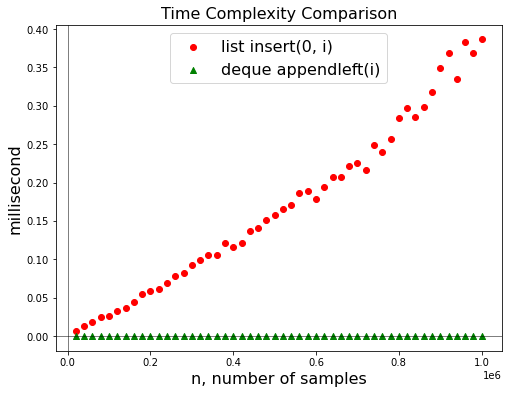

In [6]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 6))
plt.scatter(n, list_time, label='list insert(0, i)', marker='o', color='r')
plt.scatter(n, deque_time, label='deque appendleft(i)', marker='^', color='g')
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('n, number of samples', fontsize = 16)
plt.ylabel('millisecond', fontsize = 16)
plt.title('Time Complexity Comparison', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

## Step 7: Profiling using `timeit()` and `lambda`

학습자들 중에 `lambda`에 대하여 익숙하지 않다면, 본 강의 노트의 아래 부분에 기술되어 있는 것을 먼저 참조한 후에 진행하면 도움이 될 것입니다. 

- 여기서는 우리가 만들어낸 `perf_timeit()` 대신, 기존의 `timeit()`과 `lambda`를 사용하여 동일한 내용의 프로파일링을 실행하십시오. 결과는 아래와 같은 형상이며, 일대일 매칭이 되는 것은 아닙니다.  

- 이 부분이 어렵다면, 본 강의 노트의 아래 부분에 있는 "Timeit에서 람다함수 사용하기" 부분을 먼저 학습한 후에 진행하십시오. 

__Expected Output:__ 

<img src="https://github.com/idebtor/DSpy/blob/c0d902f2aeed614a210fed946b78f1a6a4ad62a2/images/chap3/deque_profiling.png?raw=true" width=500>

In [10]:
from timeit import timeit
from collections import deque

list_time = []    # list of list_time values
deque_time = []   # list of deque_time values
n = []            # list of samples or i 

for i in range(20_000, 1_000_001, 20_000):
    x = list(range(i))
    None

    n.append(i)

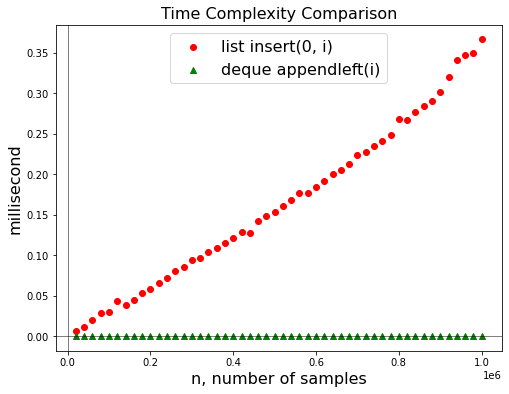

In [8]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 6))
plt.scatter(n, list_time, label='list insert(0, i)', marker='o', color='r')
plt.scatter(n, deque_time, label='deque appendleft(i)', marker='^', color='g')
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('n, number of samples', fontsize = 16)
plt.ylabel('millisecond', fontsize = 16)
plt.title('Time Complexity Comparison', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

# Timeit에서 람다 함수 사용하기

## `Using timeit.timeit`

In [ ]:
from timeit import timeit
from collections import deque

alist = list(range(100_000))
adeq  = deque(range(100_000))

list_time  = timeit("alist.insert(0, 1)", setup="from __main__ import alist", number = 100_000)
deque_time = timeit("adeq.appendleft(1)", setup="from __main__ import adeq", number = 100_000)
gain = list_time / deque_time

print(f"     list.insert() {list_time:.6} sec")
print(f"deque.appendleft() {deque_time:.6} sec  ({gain:.6}x faster)")

## `Using timeit.timeit` and Lambda function

위의 코드는 lambda function을 사용하면, 아래와 같이 좀 더 간소화 할 수 있습니다. 

In [ ]:
from timeit import timeit
from collections import deque

alist = list(range(100_000))
adeq  = deque(range(100_000))

list_time  = timeit(lambda: alist.insert(0, 1), number = 100_000)
deque_time = timeit(lambda: adeq.appendleft(1), number = 100_000)
gain = list_time / deque_time

print(f"     list.insert() {list_time:.6} sec")
print(f"deque.appendleft() {deque_time:.6} sec  ({gain:.6}x faster)")

## `Using timeit.Timer`

In [ ]:
from timeit import Timer
from collections import deque

alist = list(range(100_000))
adeq = deque(range(100_000))

list_time  = Timer("alist.insert(0, 1)", setup="from __main__ import alist").timeit(number = 100_000)
deque_time = Timer("adeq.appendleft(1)", setup="from __main__ import adeq").timeit(number = 100_000)
gain = list_time / deque_time

print(f"     list.insert() {list_time:.6} sec")
print(f"deque.appendleft() {deque_time:.6} sec  ({gain:.6}x faster)")

## `Using timeit.Timer` and Lambda function

위의 코드는 lambda function을 사용하면, 아래와 같이 좀 더 간소화 할 수 있습니다. 

In [ ]:
from timeit import Timer
from collections import deque

alist = list(range(100_000))
adeq = deque(range(100_000))

list_time  = Timer(lambda: alist.insert(0, 1)).timeit(number = 100_000)
deque_time = Timer(lambda: adeq.appendleft(1)).timeit(number = 100_000)
gain = list_time / deque_time

print(f"     list.insert() {list_time:.6} sec")
print(f"deque.appendleft() {deque_time:.6} sec  ({gain:.6}x faster)")


# Reference

https://realpython.com/python-deque/